# Homework_2022_04_18

本次作业共10分，<font color=ff0000> 截止日期 4.22 23:59。</font>


## 一、膨胀与腐蚀(2')
膨胀与腐蚀是常见的图像预处理手段，本题请读入erode_dilate.jpg，并对其进行灰度化、二值化，然后基于OpenCV对图像连续进行膨胀和腐蚀操作（即“闭运算”）。

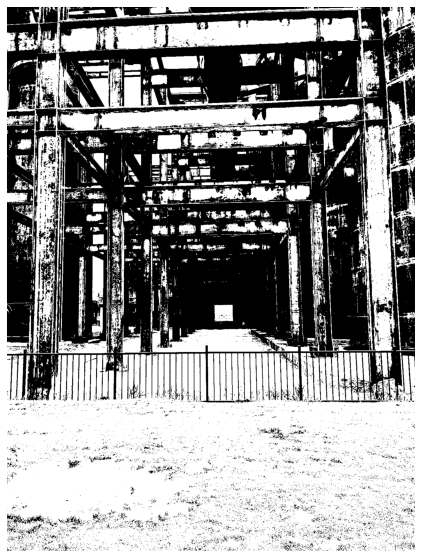

In [109]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
%matplotlib inline
img = cv.imread('erode_dilate.jpg')
gray_img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
_, binary_img = cv.threshold(gray_img, 100, 255, cv.THRESH_BINARY)
plt.figure(figsize=(16, 10))
plt.axis('off')
plt.imshow(binary_img, plt.cm.gray)

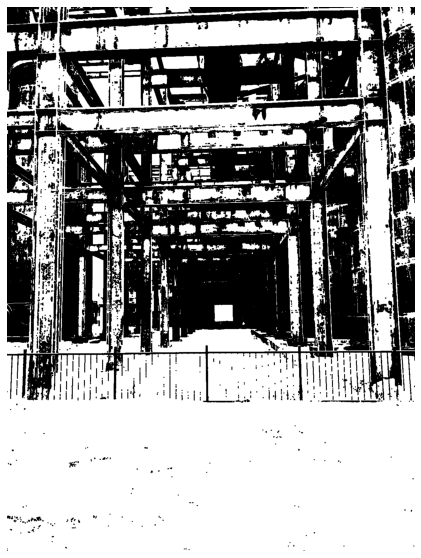

In [110]:
# TODO cv.erode() & cv.dilate()
# kernel大小可以自己决定，因此结果未必要和示例图片完全一致

## 二、Hough算法直线检测(2')
Hough算法可以用于图片中直线或椭圆、圆等形状的检测，本题我们对这种算法进行简单的应用。请对Hough.jpg**首先进行边缘检测**，再应用Hough算法，**画出Hough算法检测出的直线**，阈值可自行设定。

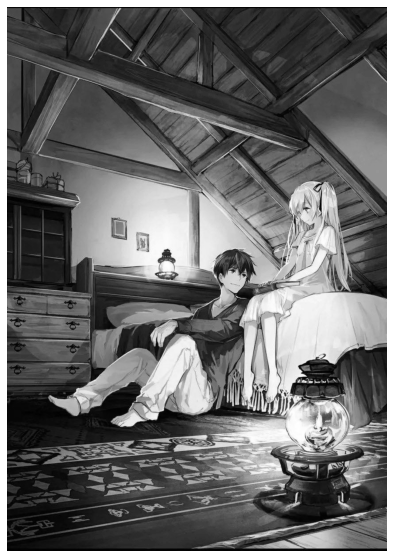

In [108]:
from skimage import transform as st
from skimage import data,feature,io,color

img = color.rgb2gray(io.imread('Hough.jpg'))
plt.imshow(img, plt.cm.gray)

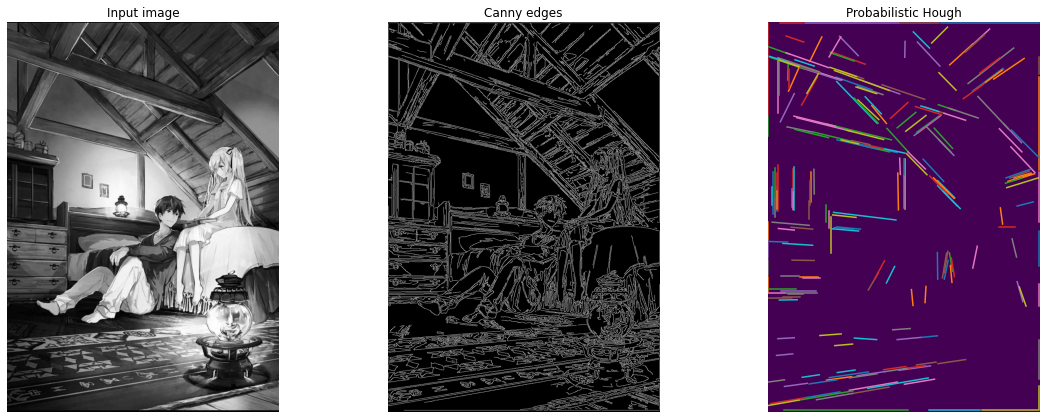

In [63]:
fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(16, 6))
plt.tight_layout()


ax0.imshow(img, plt.cm.gray)
ax0.set_title('Input image')
ax0.set_axis_off()

# TODO

#在ax1中画出canny边缘(e.g. feature.canny())

#利用Hough算法(e.g. st.probabilistic_hough_line())检测并在ax2中画出所有的直线，阈值可以自己设置，不一定与示例图片相同

## 三、离散余弦变换(3')
课上我们学习了离散余弦变换，其最广泛的应用在图片压缩领域；但基于人们对高频信息和低频信息的敏感度区别，离散余弦变换也可以用来实现数字水印、图片加密等等功能。opencv中的cv.dct()&cv.idct()功能可以方便地实现离散余弦变换及逆变换，**如果我们将图片B的频域信息覆盖在图片A的高频部分，一方面图中已经包含了足以重建图片B的信息，另一方面改写高频部分对原图看上去并不会有太大的改观，从而实现“隐藏”了图片B**。

本题所提供的lena_and_more.png看上去是那张最经典的Lena照片，但实际上我在里面藏了另一幅照片，**请从频域信息中提取并重建这幅照片**。

请注意，三个颜色通道都需要进行类似的操作；为简便起见，本题对全图整体进行DCT，不需要额外分割；隐藏图片的大小为256\*256；本题不提供示例输出（否则就不算隐藏了x）。

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


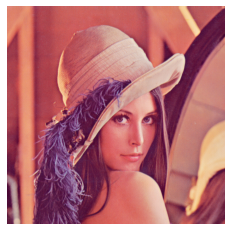

In [224]:
img = cv.cvtColor(cv.imread('lena_and_more.png'), cv.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)
# TODO
# 提示：完成DCT后哪个区域被修改对原图影响最小？

## 四、Seam Carving(3')
Seam Carving可以实现图片的剪裁，而又不会更改图中重点物体的形状。本题我们实现对SC.jpg的剪裁，请**在纵向截去150个像素**，展现Seam Carving后的结果。

以下代码框架可供参考，也可自行更改。

100%|████████████████████████████████████████████████████████████████████████████████| 150/150 [02:27<00:00,  1.02it/s]

time cost: 147.54240012168884 s


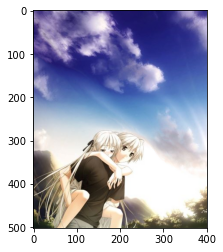

In [247]:
import time
from tqdm import trange

def energy_map(Image):
    # 计算能量
    # 对三通道分别计算横向和纵向梯度值
    # 返回值：三通道相加得到的总能量


def find_seam(energy):
    # 动态规划求最小能量路径
    # 返回值：能量，seam路径


def delete_seam(Image, seam, Energy):
    # 逐行删除对应能量值最小的像素点
    # 返回值：完成一次删除的图像


def seam_carving(Image, delta):
    # 循环多次剪切
    # 每个循环的内容：先计算能量，再找到seam路径，然后删除路径上的像素点
    # Image传入图像，delta为需要剪切的像素数，本题中为150
    # 返回值：seam carving后的图像
    
# 读取SC.jpg并完成seam_carving，请注意剪裁方向为纵向